### $\color{indianred}{\text{ПЕТА ВЈЕЖБА ИЗ АСТРОСТАТИСТИКЕ}} $

### Тестирање хипотеза

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />


Провјера усалгашености хипотеза и добијених посматрачких података је проблем који се 

често среће у астростатистици. Најједноставнији примјер је да се провјери да ли је измјерена 

вриједност $x_i$ или читав скуп података $\{x_i\}$ конзистентан са чињеницом да су узорци узети

из гаусовске расподјеле $\mathcal{N}(\mu, \sigma)$. Гаусовска расподјела је нулта хипотеза, и ако се успјешно 

одбаци, то значи да је измјерен неки ефекат. Примјер из астрономије је детекција извора, на 

сликама које *пате* од значајног позадинског шума (ако позадина флуктуира, потребно је да флукс 

извора у неком елементу резолуције слике [нпр. пикселу] буде знатно већи од варијација позадине,

да би дошло до успјешне и робусне детекције). Међутим, треба водити рачуна о томе да одбацивање

нулте хипотезе није исто што и фаворизовање хипотезе о извору, јер разумијевање позадине може 

бити непотпуно, што утиче и на сам модел из нулте хипотезе.

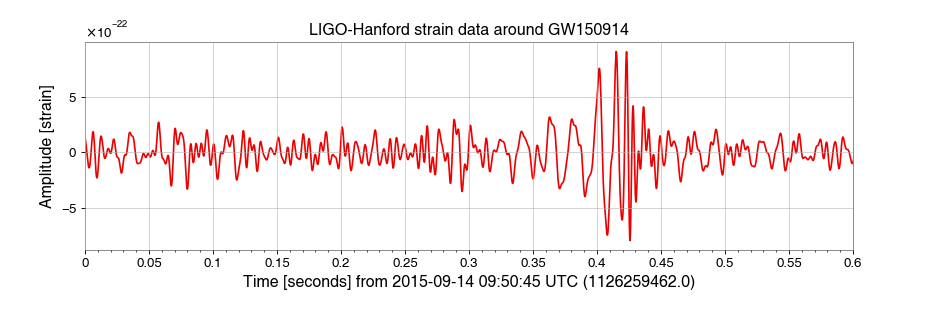

In [6]:
from IPython.display import Image, display
import os
display(Image(filename='gw150914.png'))

На слици изнад (овдје такође корисно: *photoutils* пакет за фотометрију), приказан је познат извор

гравитационих таласа (детектован 2015. године). Јасно се види шум, и онда сигнал. Као да је извор

уграђен у шум. Идеално је пронаћи праве изворе и додијелити им неки број који показује у којој 

мјери се врши одбацивање нулте хипотезе о позадини. 

---

Ако имамо податке $\{x_i\}$ (јачина неког сигнала, освијетљеност пиксела или сл.), и претпоставку

о расподјели позадине (нулта расподјела, $h_0(x)$), можемо израчунати вјероватноћу да податак има

вриједност једнако велику или већу од оне која је посматрана. Ово је **$\,p$-вриједност** података:

<div style="border:2px solid red; display:inline-block; padding:4px;">
    
$$
p_i \;=\; \int_{x_i}^{\infty} h_0(x)\,dx 
\;\equiv\; 
1 - \int_{-\infty}^{x_i} h_0(x)\,dx 
\;=\; 
1 - H_0(x_i)
$$
</div>

гдје је $H_0(x)$ заправо *CDF* нулте расподјеле.

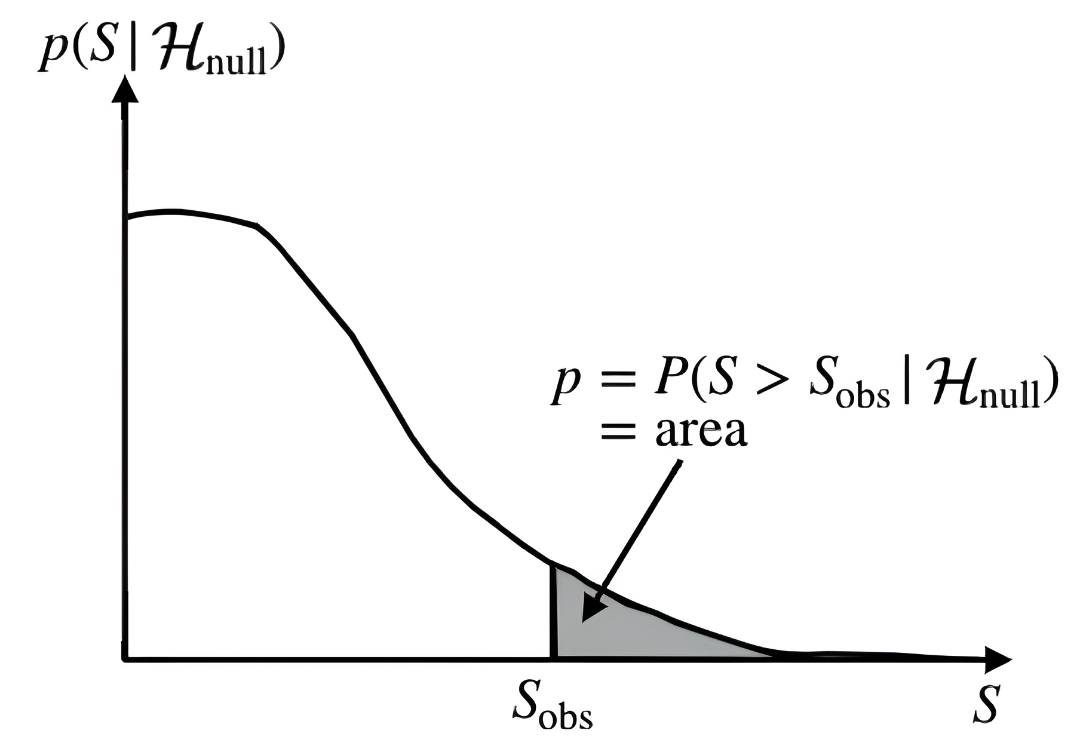

In [8]:
from IPython.display import Image, display
import os
display(Image(filename='as_051.png', width=400, height=300))

На слици изнад је расподјела статистике $S$ под нултом хипотезом $\mathcal{H}_{\text{null}}$, а $\,p$-вриједност посматране

статистике $S_{\text{obs}}$ је осјенчена површина. Обично се усваја праг $\,p$-вриједности, тзв. значајност, $\alpha$. 

Подаци "одбацују" нулту хипотезу ако је $p_i \le \alpha$.

---

Ако нулта хипотеза не може бити одбачена, то не значи да подаци припадају позадини (можда узорак није 

довољно велики да се открије ефекат). Такође, одбацивање нулте хипотезе није нужно и доказ хипотезе о

сигналу (модел хипотезе може бити лош).

---

**ПРИМЈЕР:**

Бацамо новчић $10$ пута. *Глава* је успјешан догађај. Дефинишемо биномну расподјелу за $20$ бацања 

новчића гдје је основна вјероватноћа успјеха $0.5$. Плотујемо функцију масе вјероватноће (аналогија

са густином вјероватноће, за дискретне фунцкије). Ако нпр. добијемо *главу* $14$ пута, онда тражимо

колика је $\,p$-вриједност којом одбацујемо хипотезу да је новчић поштен.

---

**НАПОМЕНА:** у плотовима испод нећемо нужно обиљежавати осе, јер су примјери показни.

In [138]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import scipy.stats
from scipy import optimize
from astroML import stats as astroMLstats

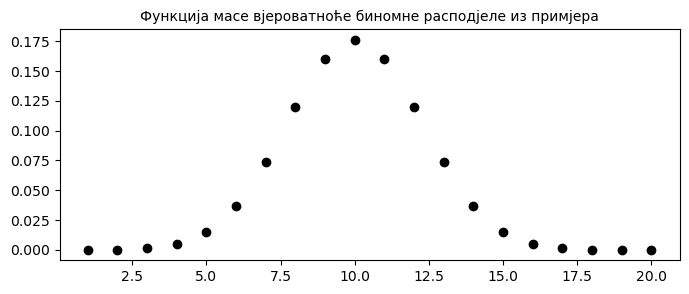

In [139]:
n = 20
ks = np.arange(0,n) + 1
draws = np.array([scipy.stats.binom.pmf(k, n, 0.5) for k in ks])
plt.figure(figsize=(8,3))
plt.scatter(ks, draws, color='black')
plt.title('Функција масе вјероватноће биномне расподјеле из примјера', fontsize=10)
plt.show()

In [140]:
np.sum(draws[ks>=14]) # колико је ријетко добити барем 14 "глава", ако је новчић поштен

0.0576591491699219

Ако у $20$ бацања нпр. добијемо $\,p$-вриједност од $0.001$, можемо наћи број добијених *глава*.

In [141]:
scipy.stats.binom.isf(1e-3, 20, 0.5) # 0.5 значи да је новчић фер (као и прије)

17.0

Овдје постоје два типа грешака (мисли се на класификацијске одлуке):

**1. Грешке типа I**

Нулта хипотеза је истинита (новчић је стварно фер), али ми је одбацимо. Ово су лажни позитиви, а њихова

вјероватноћа се тражи преко нивоа значајности $\alpha$.

**2. Грешке типа II**

Нулта хипотеза је погрешна, али није одбачена. Ово су лажни негативи. Повезани су са варијаблом $\beta$ (ту

је сигнал прави, али ми га пропустимо, па желимо да важи $\beta\rightarrow0$), која се односи са $(1-\beta)$, тј. са

вјероватноћом детекције.

---

Сада прелазимо на примјер са двије гаусовске расподјеле (једна представља позадиснки шум, друга извор), које

се преклапају. Ако имамо вриједност $x$, треба мјерење да припишемо једној од двије расподјеле ($B$-background,

$S$-source). Рез је на $x_c = 120$, што води до неколико грешака типа II (лажни негативи: тачке из расподјеле

$h_S$, са $x < x_c$, бивају класификоване као шум). Међутим, онда имамо много грешака типа I (лажни позитиви: 

тачке из расподјеле $h_B$, са $x > x_c$, бивају класификоване као извори).

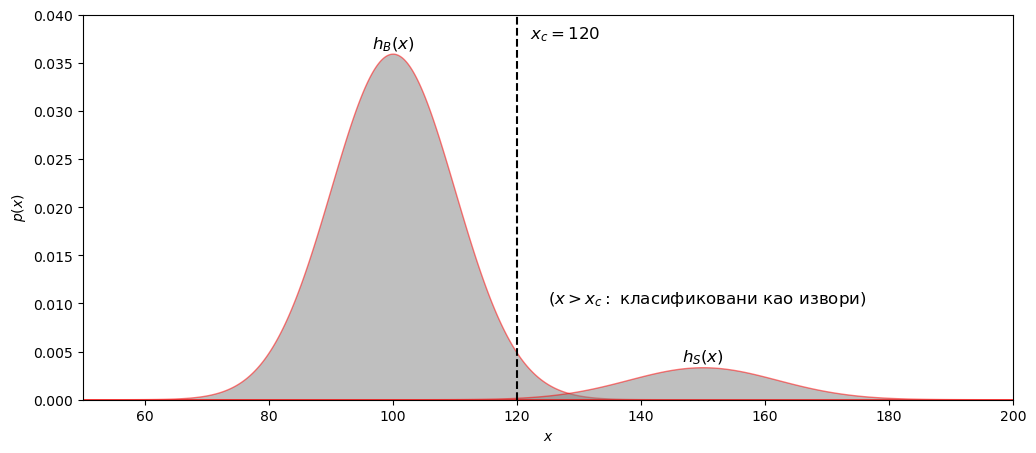

In [149]:
x = np.linspace(50, 200, 1000)
p1 = 0.9 * norm(100, 10).pdf(x)
p2 = 0.1 * norm(150, 12).pdf(x)

plt.figure(figsize=(12, 5))
plt.fill(x, p1, ec='red', fc='gray', alpha=0.5)
plt.fill(x, p2, ec='red', fc='gray', alpha=0.5)
plt.plot([120, 120], [0.0, 0.04], '--k')
plt.text(100, 0.036, r'$h_B(x)$', ha='center', va='bottom', fontsize=12)
plt.text(150, 0.0035, r'$h_S(x)$', ha='center', va='bottom', fontsize=12)
plt.text(122, 0.039, r'$x_c=120$', ha='left', va='top', fontsize=12)
plt.text(125, 0.01, r'$(x > x_c:\ {\rm класификовани\ као\ извори})$', fontsize=12)
plt.xlim(50, 200)
plt.ylim(0, 0.04)
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

Ако су подаци $\{x_i\}$ издвојени из неке основне расподјеле:

$$
h(x) = (1 - a)\,h_B(x) + a\,h_S(x)
$$

онда имамо ознаке и објашњења:

* $h_B(x) = \mathcal{N}(\mu = 100,\,\sigma = 10)$ позадинска (шум) расподјела (нормирана на $1$),

* $h_S(x) = \mathcal{N}(\mu = 150,\,\sigma = 12)$ расподјела извора (такође нормирана на $1$),

* $a$ је релативни нормализациони фактор који узима у обзир да је позадински шум вјероватно $\frac{1 - a}{a}$ пута већи од присутва стварних извора.

Ако се праг класификације постави на $x_c = 120$, можемо израчунати вјероватноћу за грешке оба типа.

За узорак величине $N$ (који садржи позадински шум и изворе), очекивани број лажних извора (позитива) је:

$$
n_{\mathrm{spurious}} = N\,\bigl(1 - a\bigr)\,\alpha 
= N\,\bigl(1 - a\bigr)\,\int_{x_c}^{\infty} h_B(x)\,dx,
$$

а очекивани број пропуштених извора (лажни негативи) је:

$$
n_{\mathrm{missed}} = N\,a\,\beta 
= N\,a\,\int_{0}^{x_c} h_S(x)\,dx.
$$

Укупан број класификованих (детектованих) извора (тј. број случајева гдје се одбацује нулта хипотеза) је:

$$
n_{\mathrm{source}} 
= N\,a - n_{\mathrm{missed}} + n_{\mathrm{spurious}} 
= N\bigl[(1 - \beta)\,a + (1 - a)\,\alpha \bigr].
$$

Комплетност узорка (вјероватноћа детекције) дефинише се као:

$$
\eta 
= \frac{N\,a - n_{\mathrm{missed}}}{N\,a} 
= 1 - \int_{0}^{\,x_c} h_S(x)\,dx 
= 1 - \beta.
$$

Тзв. контаминираност узорка је:

$$
\varepsilon=\frac{n_{\rm spurious}}{n_{\rm source}},
$$

гдје је $(1-\varepsilon)$ ефикасност класификације.

In [145]:
xc = 120
alpha = np.trapz(p1[x>xc], dx = x[1] - x[0])
print('лажни позитиви: ', alpha)
beta = np.trapz(p2[x<xc], dx = x[1] - x[0])
print('лажни негативи: ', beta)
print('комплетност: ', 1-beta)
a=0.1
print('контаминираност: ', (1-a)*alpha/(( 1-beta)*a +(1-a)*alpha))

лажни позитиви:  0.019900194921703387
лажни негативи:  0.0006166506405920415
комплетност:  0.999383349359408
контаминираност:  0.15197625641588255


### Колмогоров-Смирнов тест (*KS*)

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

Тестирање хипотеза је уско повезано са упоређивањем расподјела. Уобичајена питања су да ли су два 

узорка извучена из исте расподјеле, или да ли је узорак извучен из неке познате расподјеле и сл.

---

Рачуна се емпиријски *CDF* $F(x)$ за два узорка: $\{x_{1i}\} = (1,\dots,N_1)$ и $\{x_{2i}\} = (1,\dots,N_2)$. Мјери се 

максимална разлика:

$$
D = \max \bigl|\,F_1(x_1) \;-\; F_2(x_2)\bigr|,
$$

гдје је $0 \le D \le 1$. Основна идеја је да знамо колико често би вриједност $D$, израчуната на 

основу наших података, настала случајем, ако су оба узорка била из исте расподјеле (што је у овом 

случају наша нулта хипотеза). **Овај резултат не зависи од конкретне расподјеле од интереса**. 

Резултат је објављен 1933. године (Колмогоров), а Смирнов је направио нумеричке таблице 1948.

године. Вјероватноћа да се добије вриједност $D$ већа од оне која је долази из наших података је:

$$
Q_{\mathrm{KS}}(\lambda) 
= 2 \sum_{k=1}^{\infty} (-1)^{\,k-1}\,e^{-2\,k^2\,\lambda^2},
$$

гдје је

$$
\lambda = \Bigl(0.12 + \sqrt{n_e} + \frac{0.11}{\sqrt{n_e}}\Bigr)\,D,
$$

а ефективни број података, $n_e$, је

$$
n_e 
= \Bigl(\frac{1}{N_1} + \frac{1}{N_2}\Bigr)^{-1}
= \frac{N_1\,N_2}{N_1 + N_2}.
$$

Ако је вјероватноћа да је $D$ настало случајем врло мала (ниско $p$), онда можемо да одбацимо нулту 

хипотезу да су оба узорка изашла из исте расподјеле. За велике $n_e$ важи $\lambda\approx\sqrt{n_e}\,D$. За $n_e > 10$ 

можемо у потпуности прескочити $Q_{\mathrm{KS}}$ и израчунати вриједност $D$ која одговара датом нивоу 

значајности $\alpha$:

$$
D_{\mathrm{KS}} = \frac{C(\alpha)}{\sqrt{n_e}},
$$

гдје је

$$
C(\alpha) = \sqrt{-\tfrac{1}{2}\,\ln(\alpha/2)}.
$$

На слици испод су два плота. Лијеви има моделовани *CDF* (црвено) и емпиријски *CDF* (плаво). Десни

плот представља двоузорачку KS статистику (*CDF* × 2 - оба су емпиријска).

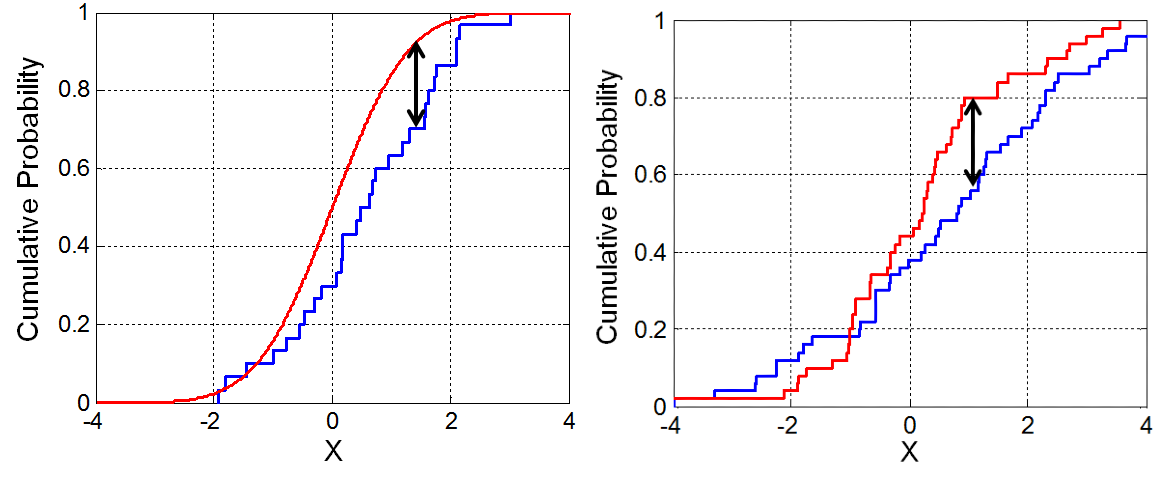

In [146]:
alphas = [0.20, 0.15, 0.10, 0.05, 0.025, 0.01, 0.005, 0.001] # нивои значајности
def C(alpha):
    return np.sqrt(-0.5 * np.log(alpha/2))

print(f"{'alpha':>8} | {'C(alpha)':>8}")
print("-" * 20)
for a in alphas:
    print(f"{a:8.3f} | {C(a):8.3f}")

   alpha | C(alpha)
--------------------
   0.200 |    1.073
   0.150 |    1.138
   0.100 |    1.224
   0.050 |    1.358
   0.025 |    1.480
   0.010 |    1.628
   0.005 |    1.731
   0.001 |    1.949


In [150]:
# поређење гаусовског узорка са расподјелом из гаусовске нулте хипотезе
x = np.random.normal(loc=0, scale=1, size=100000)
print(stats.kstest(x, 'norm'))

# поређење студентове t расподјеле са 100 степени слободе и гаусовске расподјеле
np.random.seed(42)
print(stats.kstest(stats.t.rvs(df=100, size=100), 'norm'))

# провјера да ли су два узорка из исте расподјеле (двоузорачки тест)
print(stats.ks_2samp(stats.t.rvs(df=100, size=10000), stats.t.rvs(df=100, size=100)))

KstestResult(statistic=0.002242549677621941, pvalue=0.6950617515988846, statistic_location=0.11286838575471958, statistic_sign=-1)
KstestResult(statistic=0.1094480639463396, pvalue=0.16907634845894612, statistic_location=-0.3303918854349172, statistic_sign=1)
KstestResult(statistic=0.083, pvalue=0.4779319301365823, statistic_location=-0.719524279610436, statistic_sign=-1)


### Непараметарско моделовање и хистограми

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

Хистограми се намећу као природно рјешење кад нпр. имамо једнодимензионалне податке. Међутим,

са њима могу да се појаве одређени проблеми.

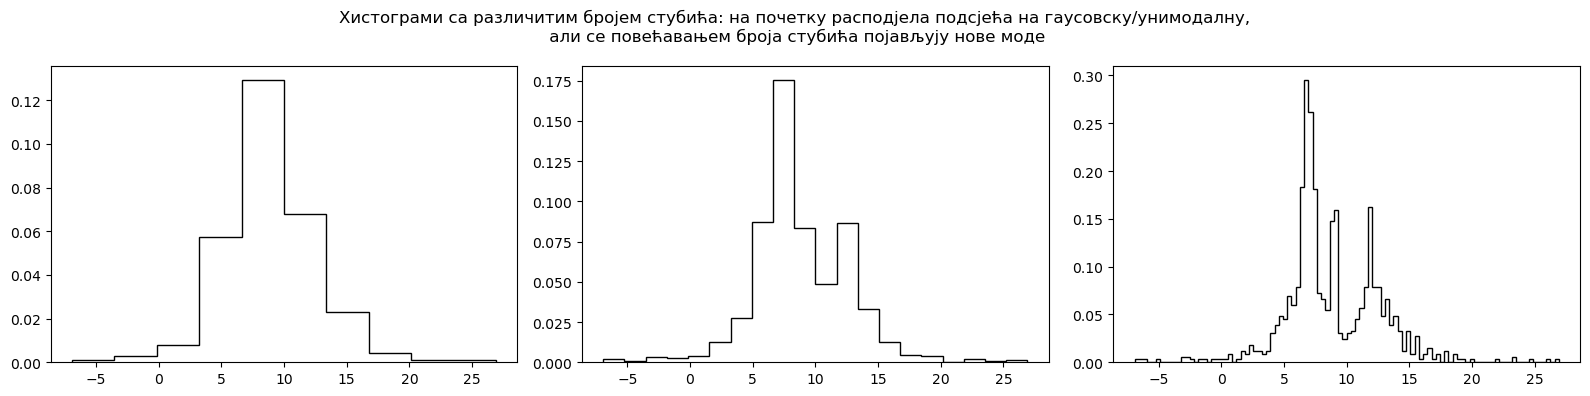

In [79]:
# генерисање више Кошијевих расподјела
np.random.seed(0)
N = 1000
mu_gamma_f = [(5, 1.0, 0.1),
              (7, 0.5, 0.5),
              (9, 0.1, 0.1),
              (12, 0.5, 0.2),
              (14, 1.0, 0.1)]
true_pdf = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])
x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N))
                    for (mu, gamma, f) in mu_gamma_f])
np.random.shuffle(x)
x = x[x > -10]
x = x[x < 30]

# нормализовани хистограми

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.hist(x,bins=10,histtype='step', color='black', density=True)
plt.subplot(132)
plt.hist(x,bins=20,histtype='step', color='black', density=True)
plt.subplot(133)
plt.hist(x,bins=100,histtype='step', color='black', density=True) 
plt.suptitle('Хистограми са различитим бројем стубића: на почетку расподјела подсјећа на гаусовску/унимодалну,\n али се повећавањем броја стубића појављују нове моде')
plt.tight_layout()
plt.show()

Са плотова изнад видимо да мала промјена хиперпараметара хистограма значајно мијења *PDF*. Подаци су

остали исти све вријеме. Један од проблема је то што неки стубићи заврше са мало/или без података. 

Ширина стубића може бити промјењива (уз то да се исти број објеката приписује сваком стубићу).

$$
bins = np.append(np.sort(x)[::M], np.max(x)),\,M-\text{Број објеката по ступцу}
$$

In [81]:
a = np.linspace(1,42,num=42)
print(a, a[::2], a[::3] )

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42.] [ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35.
 37. 39. 41.] [ 1.  4.  7. 10. 13. 16. 19. 22. 25. 28. 31. 34. 37. 40.]


In [85]:
# "слајсовање"
bins100 = np.append(np.sort(x)[::100], np.max(x)) 
bins30 = np.append(np.sort(x)[::30], np.max(x))
print(len(x), len(bins100),len(bins30))
bins100

981 11 34


array([-6.92142972,  5.2432259 ,  6.49176043,  6.87252468,  7.21447313,
        7.9733059 ,  9.01101366, 11.08945533, 12.05155804, 13.82703299,
       26.91818424])

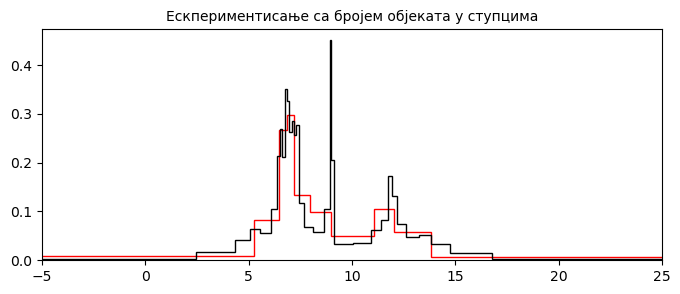

In [116]:
plt.figure(figsize=(8,3))
_ = plt.hist(x, bins=bins100, color='red', density=True, histtype='step') 
plt.hist(x, bins=bins30, color='black', density=True, histtype='step')
plt.xlim(-5,25)
plt.title('Ескпериментисање са бројем објеката у ступцима', fontsize=10)
plt.show()

Постоји неколико правила која сугеришу правилно подешавање величине ступаца. Скотово правило

за оптималну ширину ступца је:

$$
\Delta_b = \frac{3.5\,\sigma}{N^{1/3}}.
$$

Међутим, ако није познато $\sigma$, онда се користи Фридман-Дијаконисово правило:

$$
\Delta_b = \frac{2\,\bigl(q_{75} - q_{25}\bigr)}{N^{1/3}}
= \frac{2.7\,\sigma_G}{N^{1/3}}.
$$

In [91]:
from astroML import stats as astroMLstats
sigmaG = astroMLstats.sigmaG(x)
print(sigmaG)

3.6731977984018402


In [95]:
binsize = 2.7*sigmaG/(N**(1/3))
print(binsize)
binsG = np.append(np.arange(start=x.min(), stop=x.max(), step=binsize) , x.max()) 
print(len(binsG))
print(binsG)

0.9917634055684971
36
[-6.92142972e+00 -5.92966631e+00 -4.93790291e+00 -3.94613950e+00
 -2.95437610e+00 -1.96261269e+00 -9.70849286e-01  2.09141194e-02
  1.01267752e+00  2.00444093e+00  2.99620434e+00  3.98796774e+00
  4.97973115e+00  5.97149455e+00  6.96325796e+00  7.95502136e+00
  8.94678477e+00  9.93854818e+00  1.09303116e+01  1.19220750e+01
  1.29138384e+01  1.39056018e+01  1.48973652e+01  1.58891286e+01
  1.68808920e+01  1.78726554e+01  1.88644188e+01  1.98561822e+01
  2.08479456e+01  2.18397090e+01  2.28314724e+01  2.38232359e+01
  2.48149993e+01  2.58067627e+01  2.67985261e+01  2.69181842e+01]


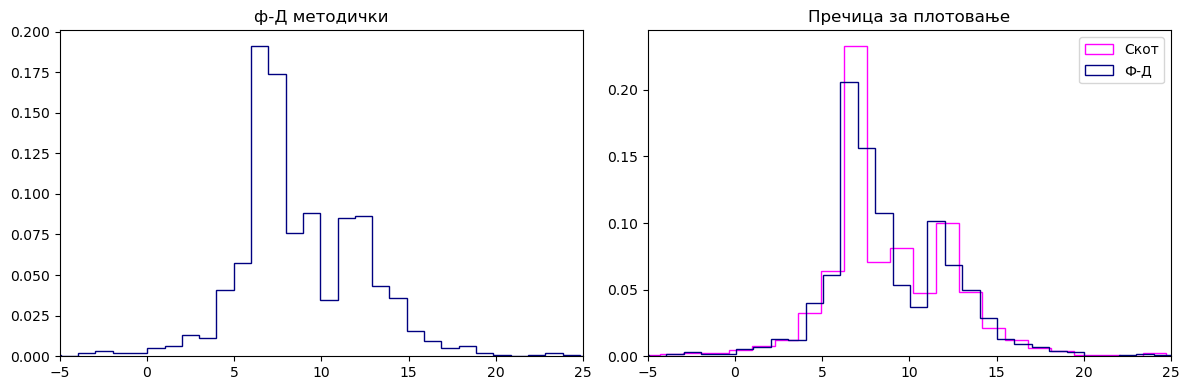

In [115]:
from astropy.visualization.hist import hist as fancyhist

plt.figure(figsize=(12,4))
plt.subplot(121)
_ = plt.hist(x, bins=binsG, color='navy', density=True, histtype="step") 
plt.xlim(-5,25)
plt.title(r'ф-Д методички')

plt.subplot(122)
_ = fancyhist(x, bins='scott', color='magenta', label='Скот', histtype='step',density=True)
_ = fancyhist(x, bins='freedman', color='navy', label='Ф-Д', histtype='step',density=True)
plt.xlim(-5,25)
plt.legend()
plt.title(r'Пречица за плотовање')
plt.tight_layout()
plt.show()

Изнад видимо да се чак ни формуле не поклапају у потпуности, кад плотујемо. Испод ћемо

приказати све податке, преко тзв. *rug plot*-а, и сада се стиче бољи преглед тога гдје се

стварно налази већина података, а гдје су празнине. Међутим, губи се дојам о релативном 

броју објеката. Да ли је $\sim10$ објеката на $x=5$ или их има на стотине...

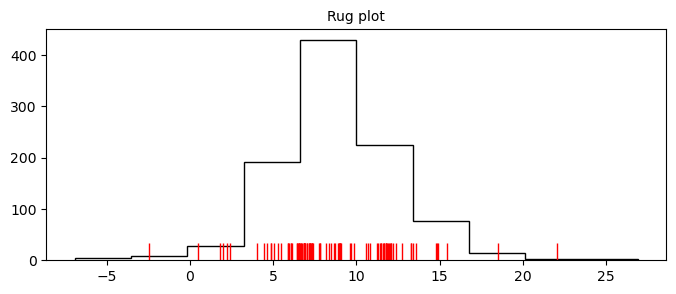

In [114]:
plt.figure(figsize=(8,3))
plt.hist(x, histtype='step', color='black')
plt.plot(x[:100], 0*x[:100], '|', color='red', markersize=25)  
plt.title('Rug plot', fontsize=10)
plt.show()

### *Kernel Density Estimation* 

(*не постоји погодан пријевод, ако нађете јавите xD*)

<hr style="border: none; height: 2px; background-color: red; opacity: 0.5;" />

Сваки податак се више не представља као $\delta$ функција, већ као расподјела (нпр. гаусовска).

Појединачне расподјеле (језгра) се затим сабирају како би се добила процијењена функција густине

вјероватноће. Предност методе је у томе што се комбинују бенефити од хистограма (релативна

висина расподјеле) и од *rug-plot*-а (које центрира податке на њихове стварне локације, умјесто у

произвољан ступац). Готово свака расподјела може се користити као језгро (најчешћа су гаусовско и

*Епанечниковљево*). Мана гаусовског језгра је што су репови бесконачни у продужецима, па имамо то 

да свака тачка има коначну вјероватноћу да буде свуда. Епанечниковљево језгро има скраћене репове.

Треба одлучивати и о ширини језгра (*bandwidth* - пропусни опсјег) што је у пракси и најважније за *KDE*.

In [118]:
# KDE
from sklearn.neighbors import KernelDensity
xgrid = np.linspace(x.min(),x.max(),1000) # ово користимо за плотовање

def kde_sklearn(data, bandwidth = 1.0, kernel='linear'):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # враћа се лог. густина
    return np.exp(log_pdf)

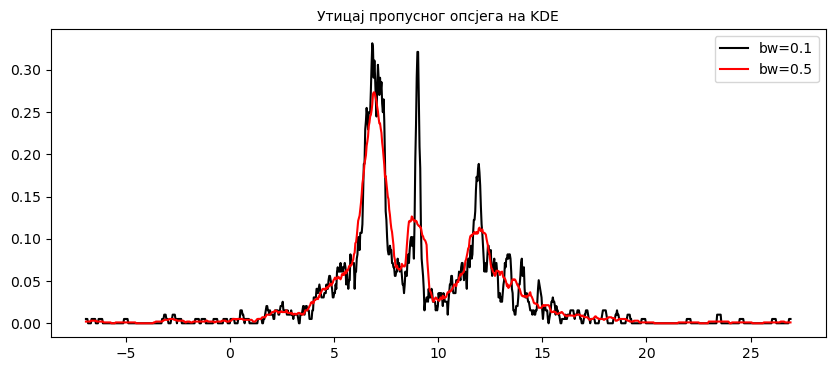

In [131]:
plt.figure(figsize=(10,4))
PDFtophat = kde_sklearn(x,bandwidth=0.1, kernel='tophat') # користимо tophat јер је близак rug plotu
plt.plot(xgrid,PDFtophat, color='black', label='bw=0.1') 
PDFtophat = kde_sklearn(x,bandwidth=0.5, kernel='tophat') 
plt.plot(xgrid,PDFtophat, color='red', label='bw=0.5')
plt.title('Утицај пропусног опсјега на KDE', fontsize=10)
plt.legend()
plt.show()

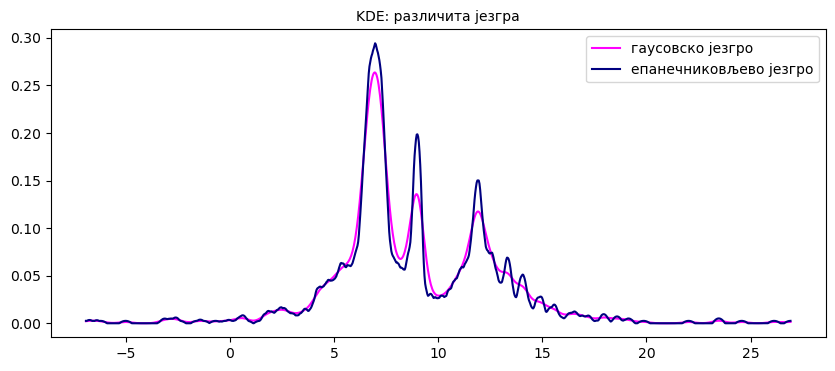

In [134]:
plt.figure(figsize=(10,4))
PDF = kde_sklearn(x,bandwidth=0.3,kernel="gaussian") 
plt.plot(xgrid, PDF, color='magenta', label='гаусовско језгро')
PDF = kde_sklearn(x,bandwidth=0.3,kernel="epanechnikov")
plt.plot(xgrid, PDF, color='navy', label='епанечниковљево језгро') 
plt.title('KDE: различита језгра', fontsize=10)
plt.legend()
plt.show()

Прављење хистограма је прва анализа коју правимо над подацима и свакако је најразумније рјешење

кад је у питању стицање осјећаја за податке. Међутим, још једном нагласак на то да се мора водити

рачуна о **ширини ступаца и пропусном опсјегу (KDE)**. Циљ је извући структуру расподјеле и превазићи

ефекте коначног узроковањаа у ступцима. Нормализована висина ступаца се може разумјети кроз:

$$
f_k = \frac{n_k}{\Delta_b\,N},
$$

гдје $k$ означава индекс ступца, $n_k$ је број елемената који падају у $k$-ти ступац, $\Delta_b$ је

ширина тог ступца, а $N$ је укупан број података (величина узорка). У случају потребе додавања 

неодређености свакој висини ступца, можемо искористити:

$$
\sigma_k = \frac{\sqrt{n_k}}{\Delta_b\,N}.
$$

Ова формула се заснива на томе да је расподјељивање у ступце заправо експеримент бројања, који је

онда одређен Поасоновом расподјелом или сл.